In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error
!pip install ensemble
from sklearn.ensemble import RandomForestClassifier
!pip install tree
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn import  metrics
!pip install sklearn
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn import tree
%matplotlib inline

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ensemble: filename=ensemble-0.0.dev1-py3-none-any.whl size=4422 sha256=4a05baaa0540db562221a7c8d98d49f540b5642da81fb9db192dfde6fbd4bace
  Stored in directory: /root/.cache/pip/wheels/f8/5e/6d/5939762d48c36c592ff51fc93ea712a7f4ed855f81db56af90
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=75271e3d117c10bbe4c0b93bfe748fe4946a27545851a95ca38fd140d93eea7e
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for pysut: filename=pysut-1.1-py3-none-any.whl size=29062 sha256=44b07879183034b2f9611f209d4dd7064c99d96ca7520e9e16fb1691d8a80b56
  Stored in directory: /root/.cache/pip/wheels/90/75/58/dd19876c55b3ece8c118b2e60720e0fa69fc2c01d6a71d5319
Successfully built ensemble docopt pysut
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/exoplanets.csv")

In [ ]:
data

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LABEL,5087.0,1.007273,0.084982,1.00,1.000,1.00,1.000,2.0
FLUX.1,5087.0,144.505445,21506.686590,-227856.26,-42.340,-0.71,48.255,1439240.5
FLUX.2,5087.0,128.577834,21797.167583,-315440.76,-39.520,-0.89,44.285,1453319.0
FLUX.3,5087.0,147.134789,21913.092010,-284001.76,-38.505,-0.74,42.325,1468429.0
FLUX.4,5087.0,156.151203,22233.659938,-234006.87,-35.050,-0.40,39.765,1495750.0
...,...,...,...,...,...,...,...,...
FLUX.3193,5087.0,655.303147,53399.785963,-502889.37,-24.405,3.50,30.855,3616292.0
FLUX.3194,5087.0,-494.784966,17844.469520,-775322.00,-26.760,-0.68,18.175,288607.5
FLUX.3195,5087.0,-544.594264,17722.339334,-732006.00,-24.065,0.36,18.770,215972.0
FLUX.3196,5087.0,-440.239100,16273.406292,-700992.00,-21.135,0.90,19.465,207590.0


EDA-->These are graphs which says about the data obtained.

[Text(0, 0, '5050'), Text(0, 0, '37')]

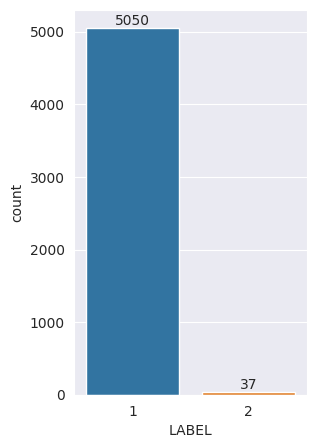

In [ ]:
# plot the data comparison chart
plt.figure(figsize=(3,5)) # set the size of the plot
ax = sns.countplot(x = 'LABEL', data = data) # plot the data and put it in ax variable
ax.bar_label(ax.containers[0]) # put the number ov values on top of the bars

The graph shows that the data is imbalanced.
Stars with exoplanet 5050/5087,
Stars without exoplanet 37/5087.

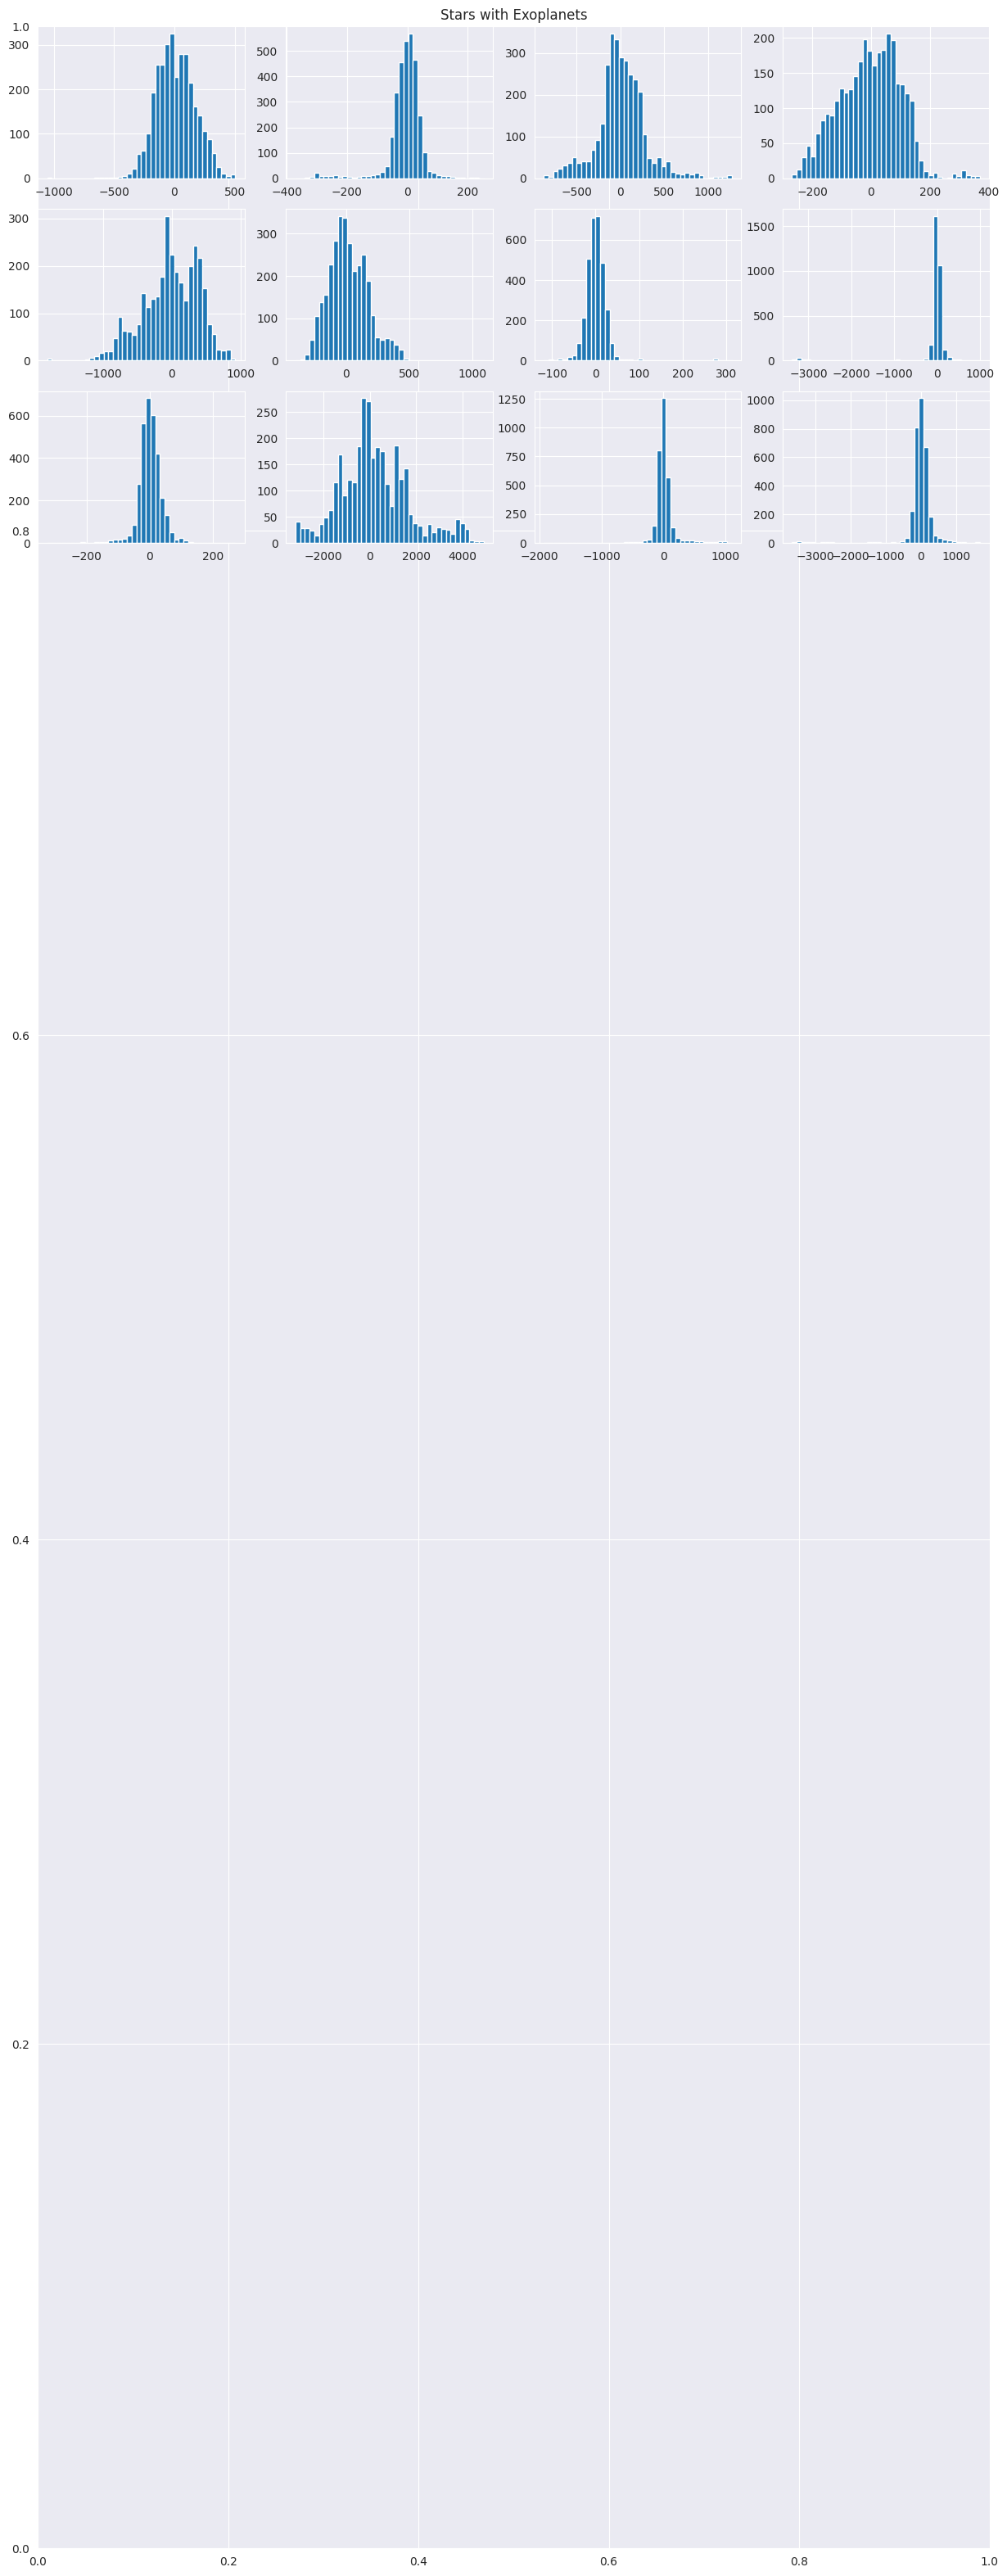

In [ ]:
fig = plt.figure(figsize=(15,40))
plt.title('Stars with Exoplanets')
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    data[data['LABEL']==2].iloc[i,1:].hist(bins=40)

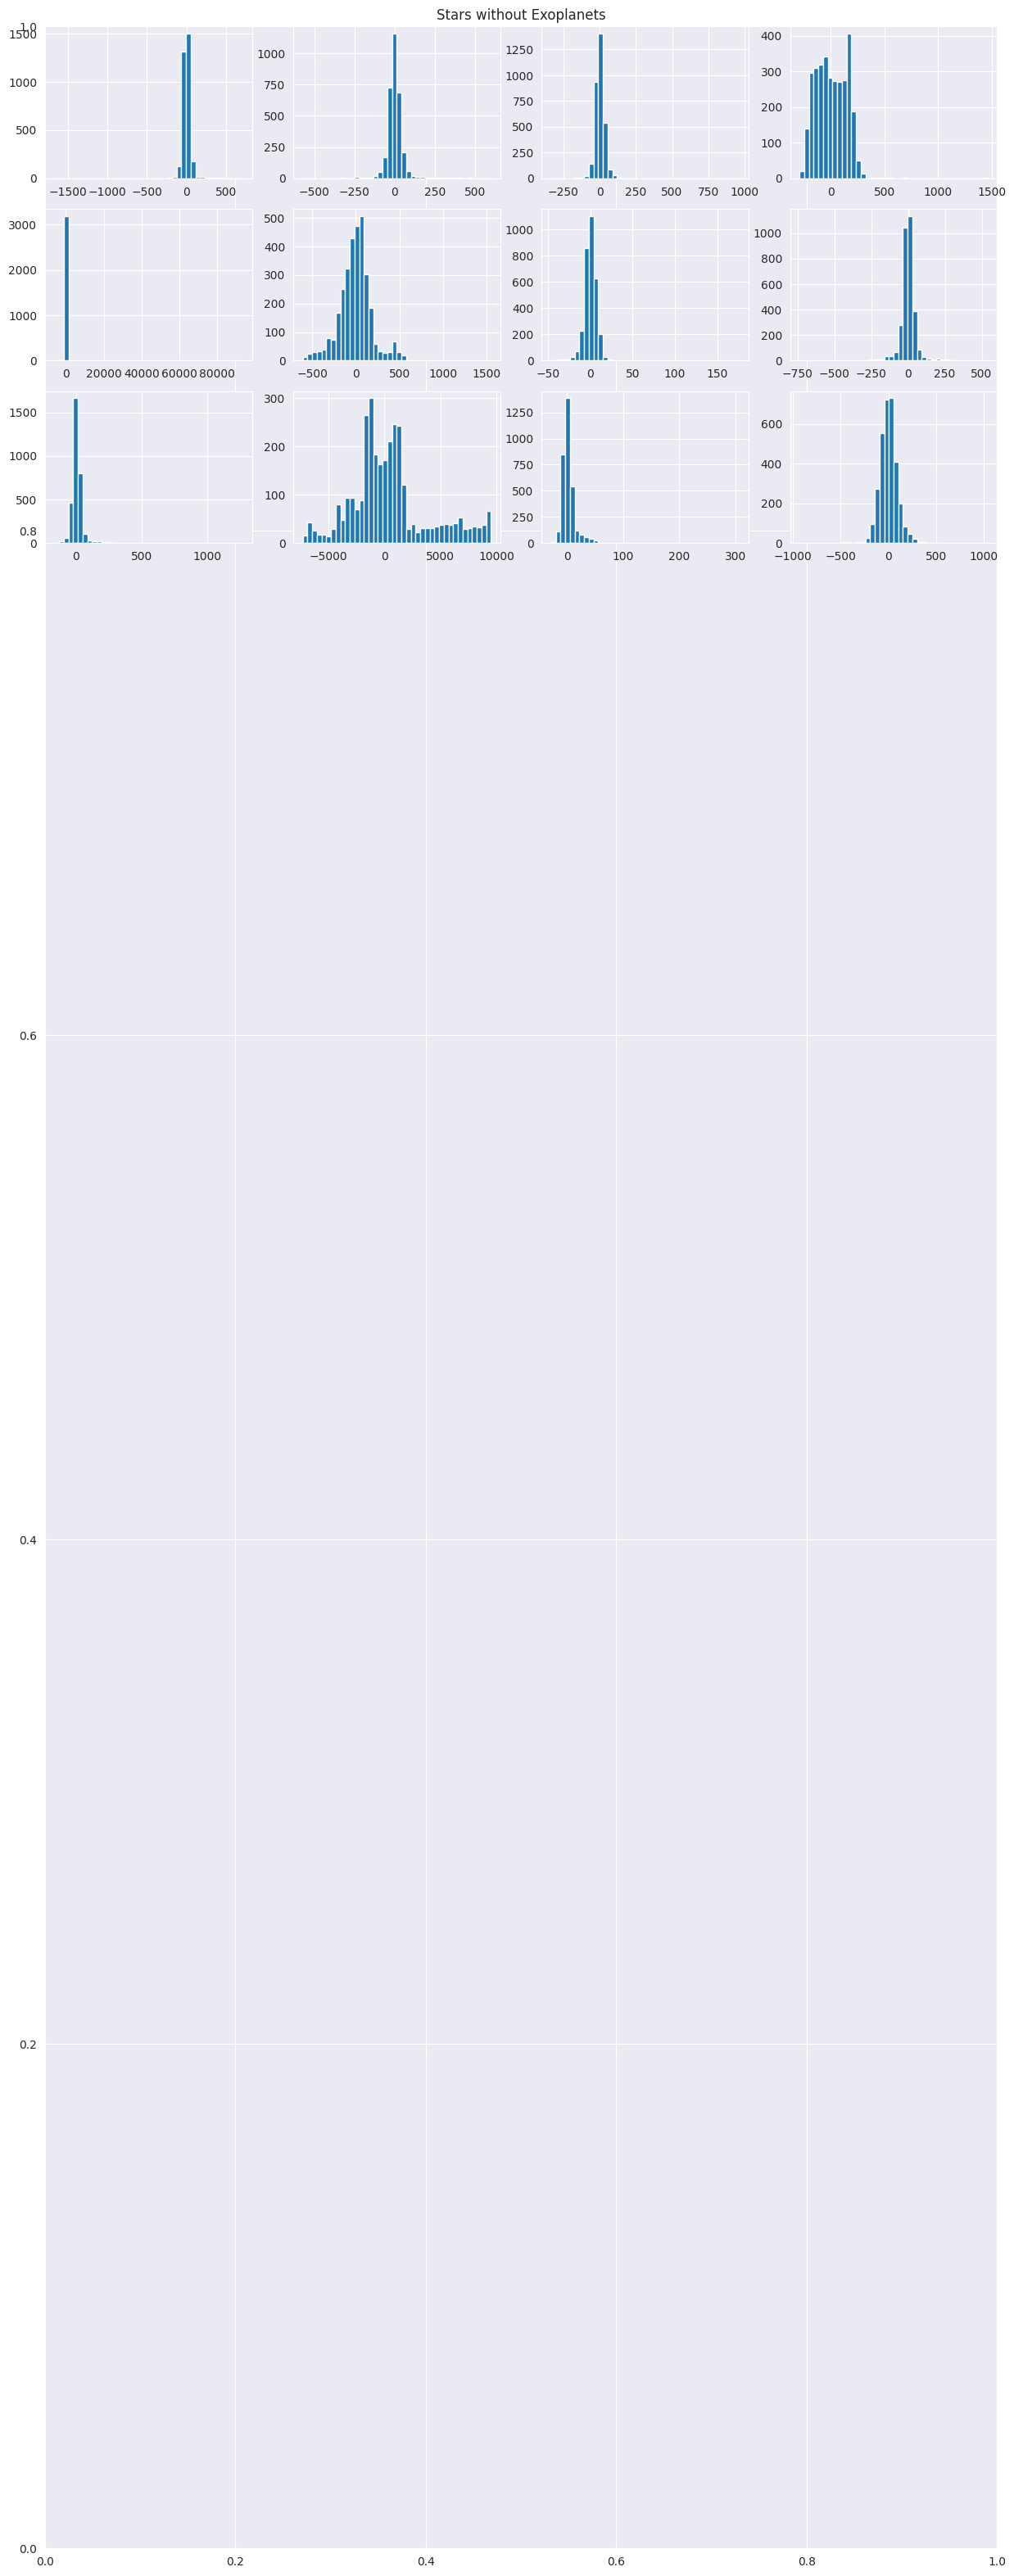

In [ ]:
fig = plt.figure(figsize=(15,40))
plt.title('Stars without Exoplanets')
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    data[data['LABEL']==1].iloc[i,1:].hist(bins=40)

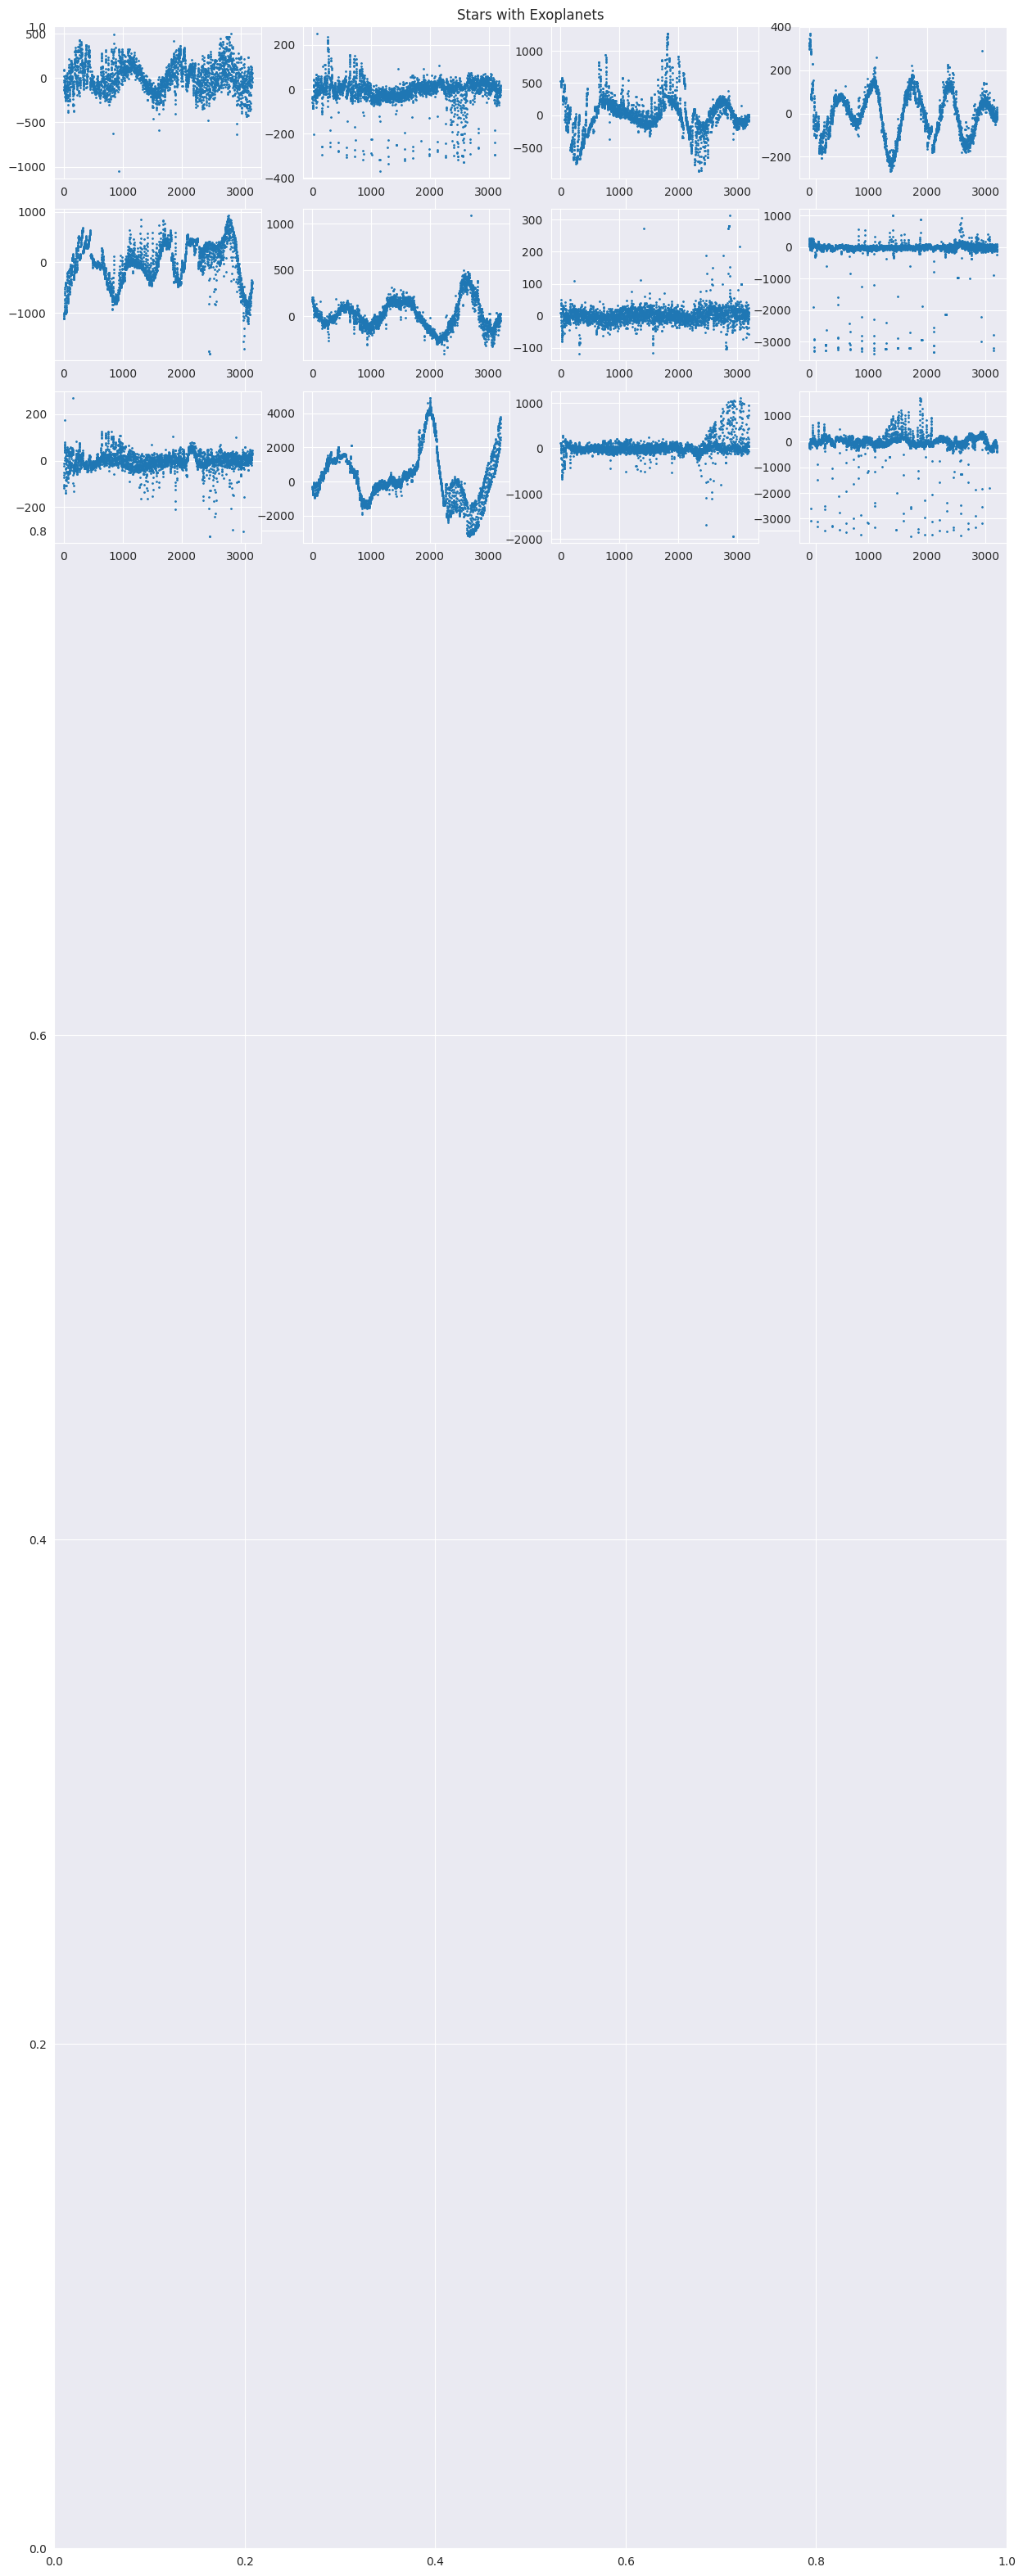

In [ ]:
fig = plt.figure(figsize=(15,40))
plt.title('Stars with Exoplanets')
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    ax.scatter(np.arange(3197),data[data['LABEL'] == 2].iloc[i,1:],s=1)

Above plot shows how the exoplanet holding star has even sin wave like curves and ups and downs in flux intensity.

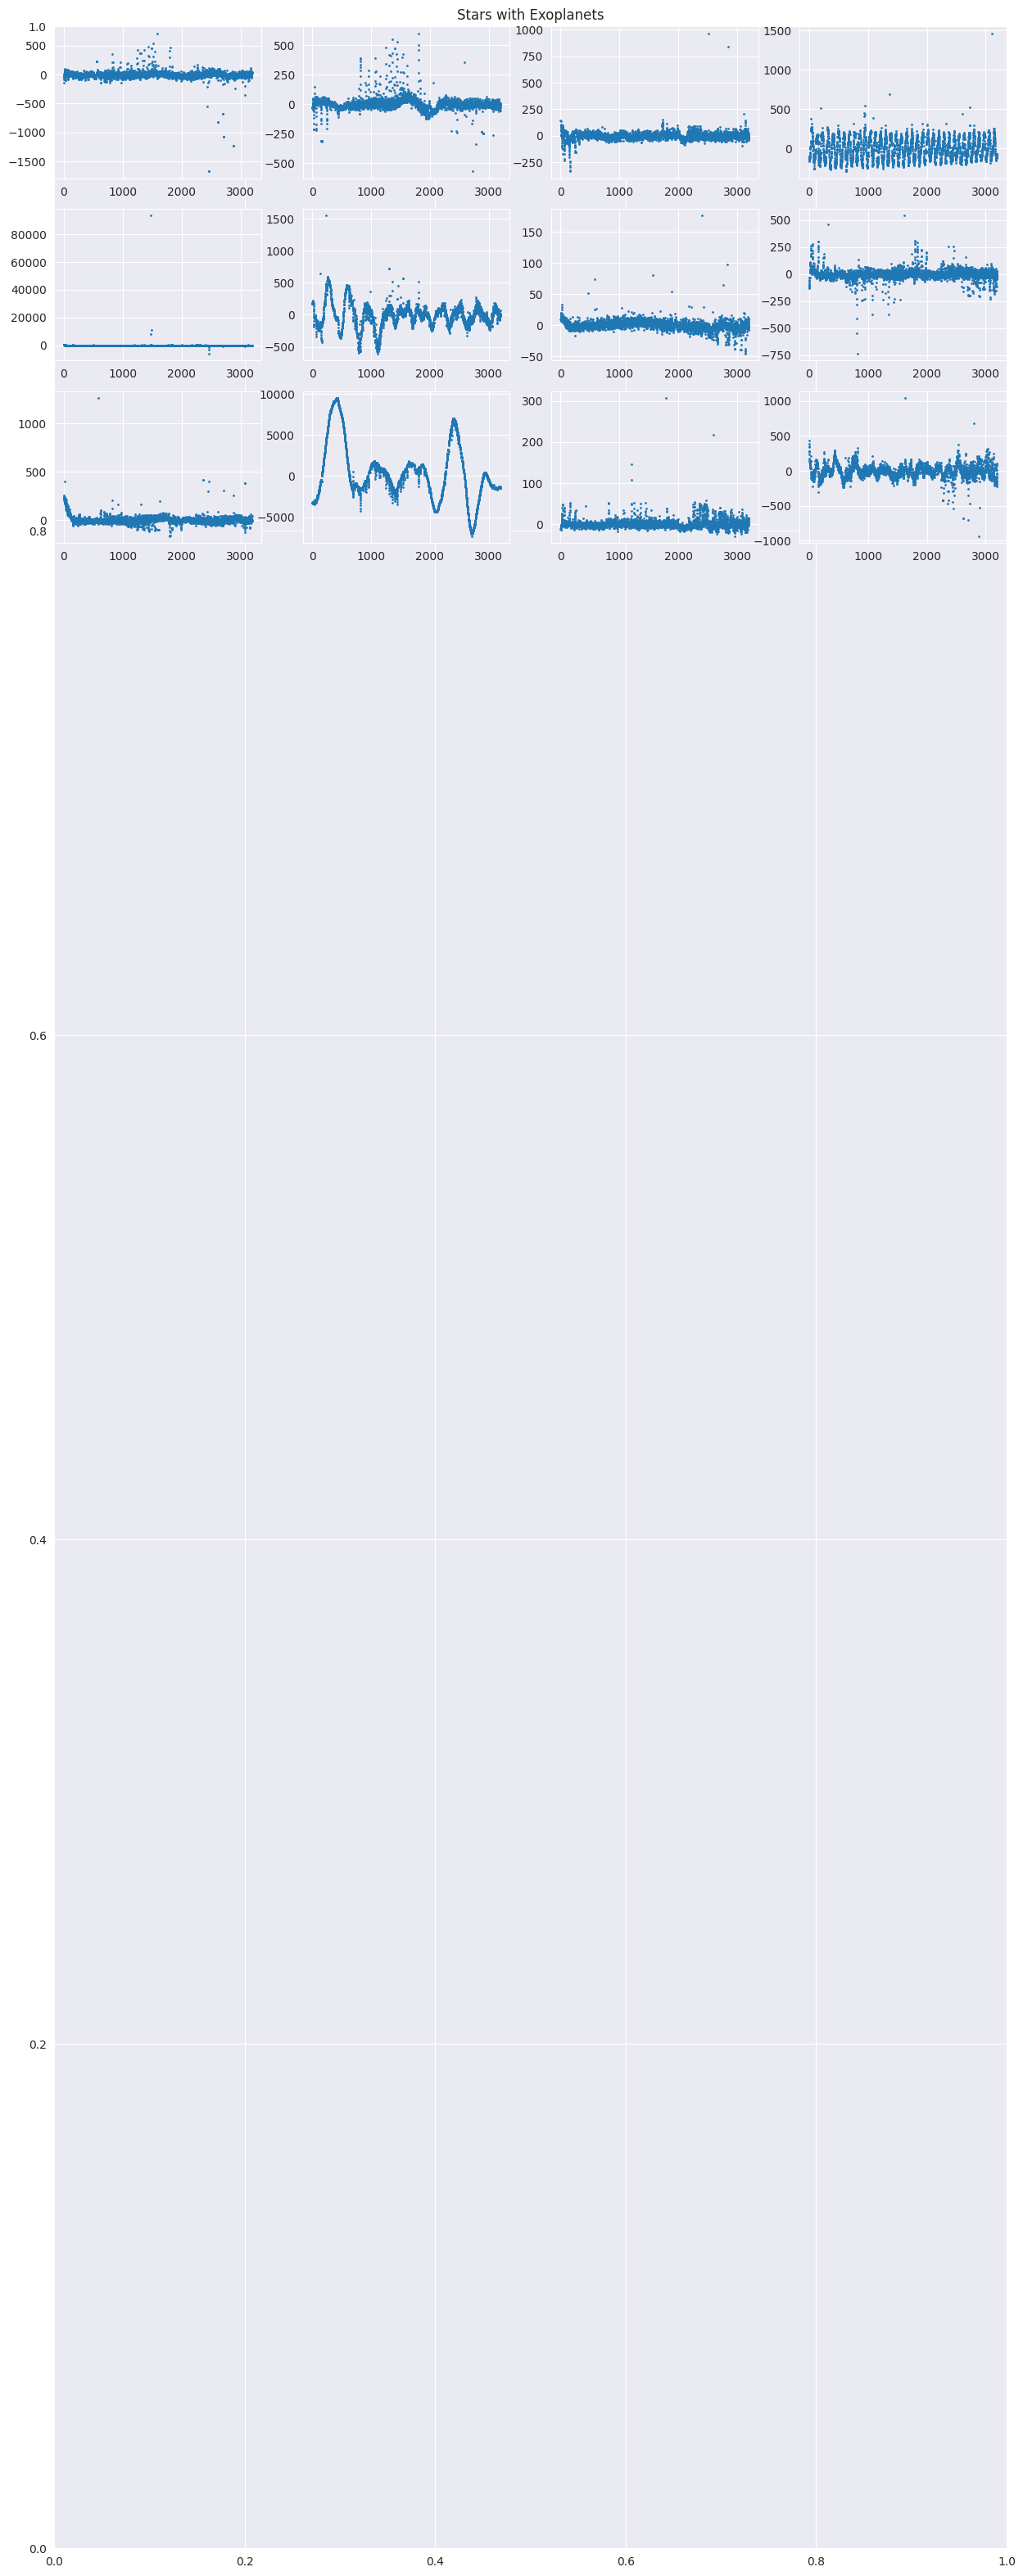

In [ ]:
fig = plt.figure(figsize=(15,40))
plt.title('Stars with Exoplanets')
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    ax.scatter(np.arange(3197),data[data['LABEL']==1].iloc[i,1:],s=1)

Above graph shows that stars without exoplanets have such a pattern of flux intensities that is uneven.

In [ ]:
plot_df = data.drop(["LABEL"], axis = 1)
plot_df

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,-11.88,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,384.34,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,238.51,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,6.29,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


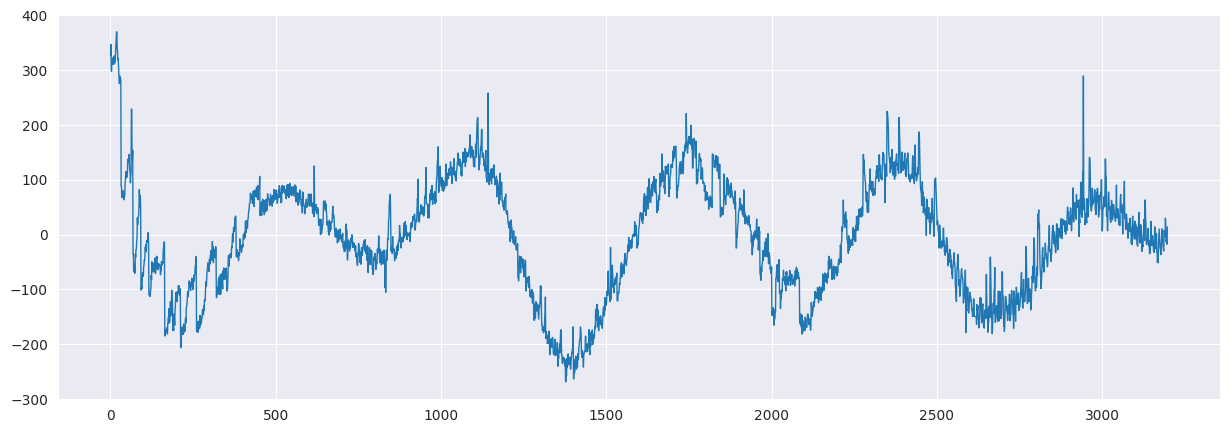

In [ ]:

# plotting a random stars to show individually the flux intensity ups and downs in an even manner.

time = range(1, 3198)
# plot the 3rd row of values, star with exoplanet
flux_val = plot_df.iloc[3,:].values
plt.figure(figsize = (15, 5))
plt.plot(time, flux_val, linewidth = 1)

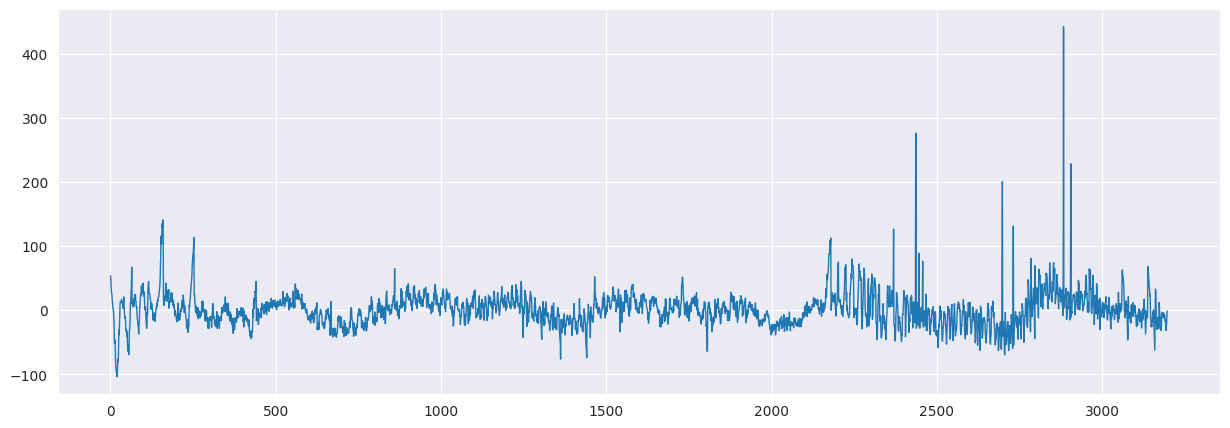

In [ ]:
# plot the 3rd row of values, star with no exoplanet

flux_val = plot_df.iloc[666,:].values
plt.figure(figsize = (15, 5))
plt.plot(time, flux_val, linewidth = 1)

In [ ]:
minima = data.iloc[:,1:].min(axis=1)
maxima = data.iloc[:,1:].max(axis=1)

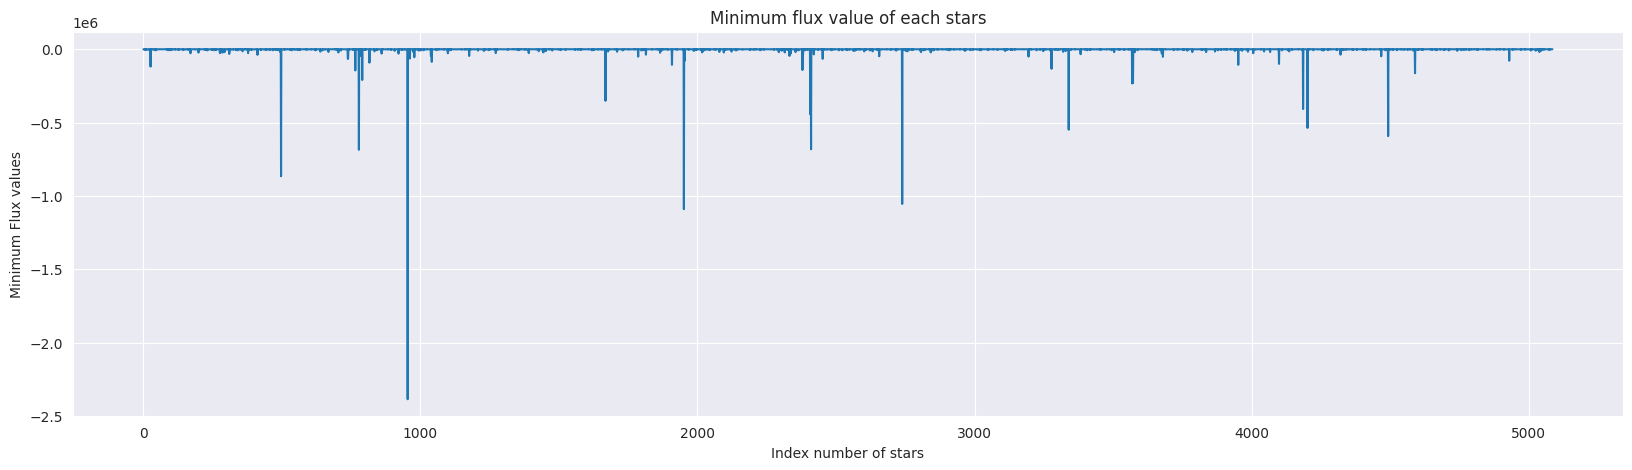

In [ ]:
plt.figure(figsize=(20,5))
plt.title('Minimum flux value of each stars')
plt.xlabel('Index number of stars')
plt.ylabel('Minimum Flux values')
plt.plot(np.arange(len(minima)),minima)

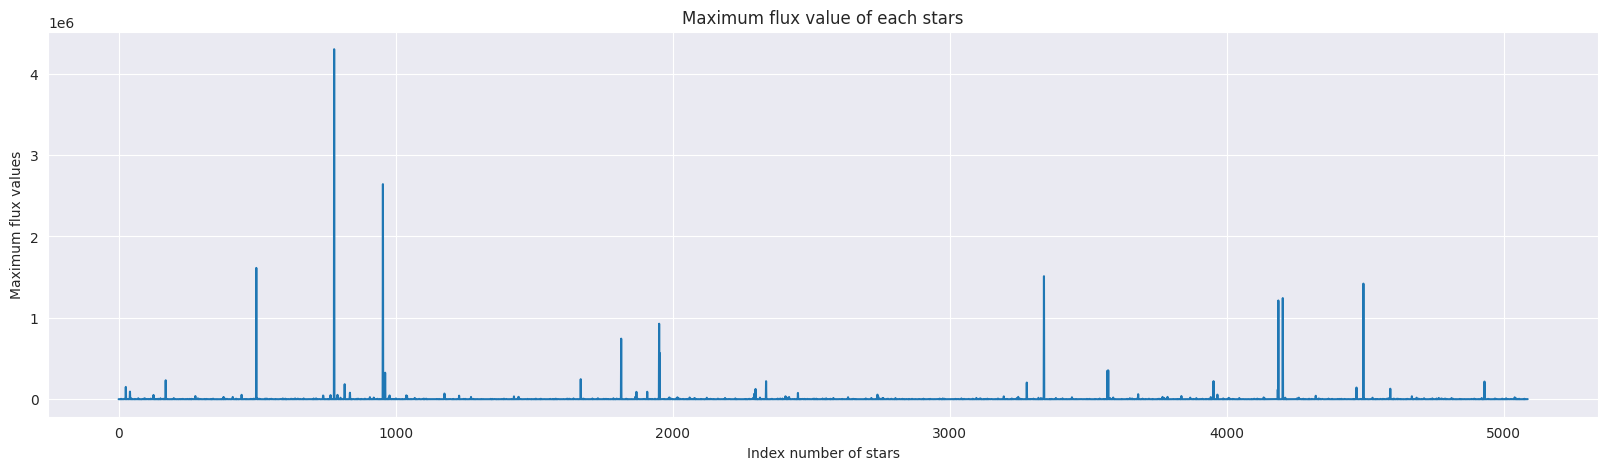

In [ ]:
plt.figure(figsize=(20,5))
plt.title('Maximum flux value of each stars')
plt.xlabel('Index number of stars')
plt.ylabel('Maximum flux values')
plt.plot(np.arange(len(maxima)),maxima)

This is a classification model. We have x values with all features except "LABEL" and y values with "LABEL" column alone.Further splitting the test and train data set. Then using SimpleImputer for filling missing values with  mean values as Strategy.Further x_train and x_test values are fit and transfored with SimpleImputed values.

In [ ]:
x = data.drop('LABEL',axis = 1)
y = data['LABEL'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
imp_mean=SimpleImputer(missing_values=np.nan,strategy='mean')
x_train= imp_mean.fit(x_train).transform(x_train)
x_test = imp_mean.fit(x_test).transform(x_test)

In [ ]:
x_train

array([[-1.560000e+00, -4.360000e+00, -4.460000e+00, ..., -1.490000e+01,
        -1.950000e+01, -1.210000e+01],
       [-4.374000e+01, -1.974000e+01,  1.776000e+01, ...,  6.563000e+01,
        -8.424000e+01, -2.308700e+02],
       [-7.144650e+03, -1.431716e+04, -4.974590e+03, ...,  7.746920e+03,
         4.743240e+03, -3.876570e+03],
       ...,
       [-2.980000e+00, -1.914000e+01, -9.680000e+00, ...,  8.840000e+00,
        -1.099000e+01,  2.102000e+01],
       [ 9.010000e+00, -4.290000e+00,  4.340000e+00, ..., -3.000000e-01,
        -1.940000e+00, -4.700000e-01],
       [-1.132500e+02, -2.035000e+02, -1.176900e+02, ..., -1.142800e+02,
        -1.738100e+02,  2.777000e+01]])

In [ ]:
x_test

array([[-18.25, -23.63, -20.83, ..., -21.43, -13.55, -19.36],
       [-30.55, -53.15, -61.91, ..., -84.55, -60.96, -36.59],
       [ 43.07,  46.73,  29.43, ...,  18.18,  51.21,   9.71],
       ...,
       [ -7.01,  -2.52,  -3.56, ...,  -1.51,   9.2 ,  -2.83],
       [101.45, 104.17, 105.16, ...,  18.79,  -2.1 ,  18.87],
       [  3.82,   2.09,  -3.29, ..., -14.55,  -6.41,  -2.55]])

In [ ]:
print("Shape of Training X :",x_train.shape)
print("Shape of Testing X :",x_test.shape)

Shape of Training X : (4069, 3197)
Shape of Testing X : (1018, 3197)


In [ ]:
print("Shape of Training y :",y_train.shape)
print("Shape of Testing y :",y_test.shape)

Shape of Training y : (4069,)
Shape of Testing y : (1018,)


In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_train_sm, y_train_sm = sm.fit_resample(x_train,y_train)

In [ ]:
x_train_sm.shape

(8080, 3197)

In [ ]:
np.shape(y_train_sm)

(8080,)

In [ ]:
np.unique(y_train_sm)


array([1, 2])

Random Forest Classifier

In [ ]:
print('Attempting to fit Random Forest Classifier')
rf = RandomForestClassifier()
rf.fit(x_train_sm,y_train_sm)

Attempting to fit Random Forest Classifier


RandomForestClassifier()

In [ ]:
y_pred_test_rf = rf.predict(x_test)
print('Accuracy on Validation set :',accuracy_score(y_test, y_pred_test_rf))
print("\n")
print(classification_report(y_test, y_pred_test_rf))

Accuracy on Validation set : 0.9911591355599214


              precision    recall  f1-score   support

           1       0.99      1.00      1.00      1010
           2       0.00      0.00      0.00         8

    accuracy                           0.99      1018
   macro avg       0.50      0.50      0.50      1018
weighted avg       0.98      0.99      0.99      1018



Text(0.5, 1.0, 'CONFUSION MATRIX')

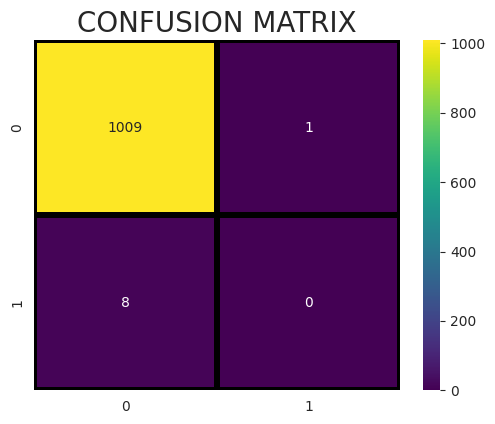

In [ ]:
#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,y_pred_test_rf),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

Getting best accuracy in Randomforest model.Further we are going to lazy predict algorithm so that in many other models we can fit the data set and see the accuracy and other necessary parameters.

In [ ]:
!pip install lazypredict
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train_sm,x_test,y_train_sm,y_test)
print(models)

 97%|█████████▋| 28/29 [20:13<00:29, 29.16s/it]

[LightGBM] [Info] Number of positive: 4040, number of negative: 4040
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.419688 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 815235
[LightGBM] [Info] Number of data points in the train set: 8080, number of used features: 3197
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [21:07<00:00, 43.72s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SGDClassifier                      0.86               0.56     0.56      0.92   
DecisionTreeClassifier             0.98               0.56     0.56      0.98   
KNeighborsClassifier               0.97               0.55     0.55      0.98   
CalibratedClassifierCV             0.97               0.55     0.55      0.98   
BernoulliNB                        0.84               0.55     0.55      0.91   
LinearSVC                          0.96               0.55     0.55      0.97   
PassiveAggressiveClassifier        0.96               0.55     0.55      0.97   
RidgeClassifierCV                  0.96               0.55     0.55      0.97   
LogisticRegression                 0.95               0.54     0.54      0.96   
Perceptron                         0.88               0.50     0.50      0.93   
QuadraticDiscriminantAnalysi

Conclusion:

We are getting good reslts and accuracy in these models which is .99 percent.Machine learning via these models will fetch good results.
QuadraticDiscriminantAnalysis       
LGBMClassifier                   
ExtraTreesClassifier             
DummyClassifier                     
RandomForestClassifier               
BaggingClassifier                     
SVC             